In [9]:
import torch
x_1 = torch.tensor([1.],requires_grad=True)
x_2 = torch.tensor([2.])
x_2.requires_grad = True
a = torch.add(x_1,x_2)
b = torch.add(x_1,x_2)
y = torch.mul(a,b)
#y = y.sin()
y.backward()
print(x_1.grad,x_2.grad)

tensor([6.]) tensor([6.])


# 计算图如下
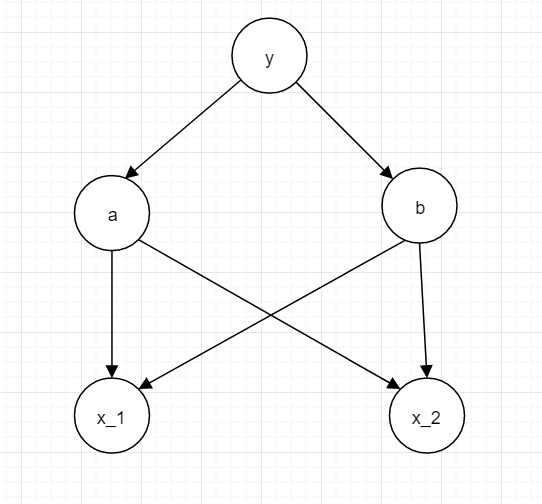
>对x_1求导就是将与x_1有关的路径上的导数相加
对x_2求导就是将与x_2有关的路径上的导数想加

`torch.tensor`总共有八个属性如下:
* `data`:数据
* `dtype`:数据类型
* `size`:尺寸
* `device`:设备
* `requires_grad`:是否需要计算梯度
* `grad`:计算出的梯度
* `grad_fn`:计算梯度以哪个函数为基准
* `is_leaf`:查看是否为叶子节点

>后面四个都与梯度有关系,在前向传播的完成之后除了叶子节点的梯度被保留下来主要是为了节约内存,其他中间节点的梯度都会被自动释放掉
但是我们的梯度下降算法是要保留各梯度值来进行梯度下降的,这时候可以使用`retain_grad()`将非叶子节点的梯度保留下来。叶子节点其实就可以看做是我们手动输入的数据,每一个中间节点的梯度计算都与输入的数据有关,特别是在随机选取权重的时候千万不能忘记保留梯度值
不然梯度下降的结果无效

In [12]:
import torch
x_1 = torch.tensor([1.],requires_grad=True)
x_2 = torch.tensor([2.])
x_2.requires_grad = True
a = torch.add(x_1,x_2)
#a.retain_grad()
b = torch.add(x_1,x_2)
#b.retain_grad()
y = torch.mul(a,b)
print(x_1.is_leaf,x_2.is_leaf,a.is_leaf,b.is_leaf,y.is_leaf)
#y = y.sin()
y.backward()
print(x_1.grad,x_2.grad)
print(a.grad,b.grad,y.grad)

True True False False False
tensor([6.]) tensor([6.])
None None None


In [14]:
import torch
x_1 = torch.tensor([1.],requires_grad=True)
x_2 = torch.tensor([2.])
x_2.requires_grad = True
a = torch.add(x_1,x_2)
#保留a的梯度值
a.retain_grad()
b = torch.add(x_1,x_2)
#保留b的梯度值
b.retain_grad()
#保留b的梯度值
y = torch.mul(a,b)
#y = y.sin()
y.backward()
print(x_1.grad,x_2.grad)
print(a.grad,b.grad,y.grad)

tensor([6.]) tensor([6.])
tensor([3.]) tensor([3.]) None


In [16]:
#显示计算梯度根据的函数
print(x_1.grad_fn,x_2.grad_fn,a.grad_fn,b.grad_fn,y.grad_fn)

None None <AddBackward0 object at 0x00000206816BD7C8> <AddBackward0 object at 0x00000206816BD808> <MulBackward0 object at 0x00000206816BD748>


In [1]:
print(1)

1
